# Clustering Analysis - Simplified Notebook
## Using ClusteringAnalyzer Class

This notebook demonstrates how to use the `ClusteringAnalyzer` class for pharmaceutical spending segmentation analysis.

### Step 1: Import the Class

In [1]:
import importlib
import clustering_analyzer

# Reload the module
importlib.reload(clustering_analyzer)
from clustering_analyzer import ClusteringAnalyzer

### Step 2: Initialize the Analyzer

Load your data by providing the path to your CSV file.

In [2]:
# Initialize with data path
analyzer = ClusteringAnalyzer(data_path='../Data/processing/engineered_features.csv')

✓ Data loaded successfully: 36 countries, 10 features


### Step 3: Find Optimal Number of Clusters (Optional)

Use elbow method and silhouette analysis to determine the best k.

✓ Features prepared and scaled: 9 features


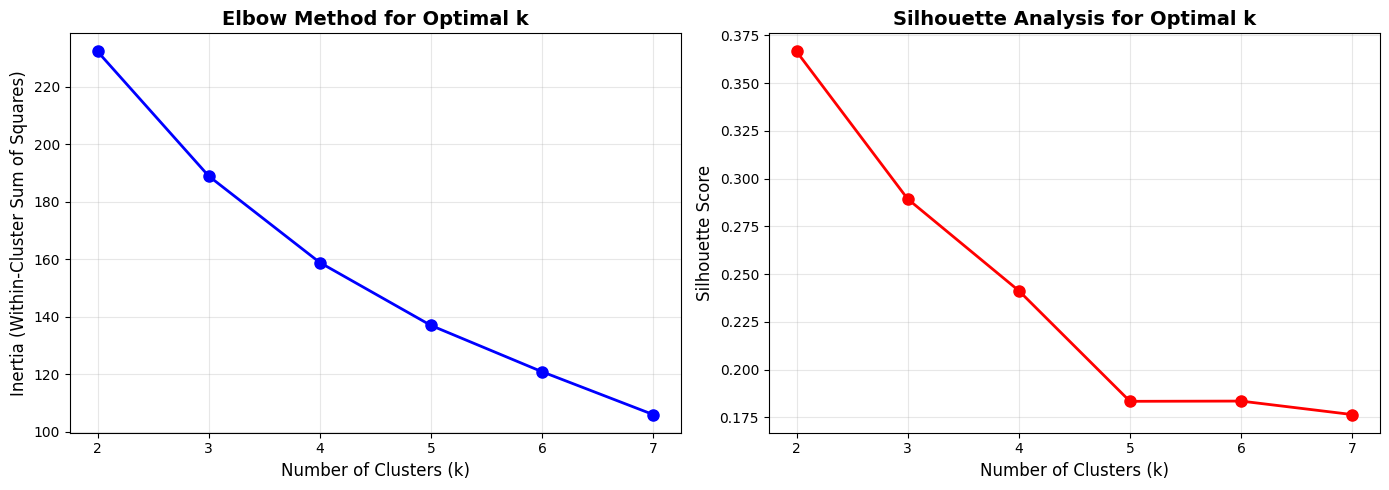


📊 Optimal k Analysis:
   Best k by Silhouette Score:
      1st: k=2 (score: 0.367)
      2nd: k=3 (score: 0.289)


In [3]:
# Find optimal k
optimization_results = analyzer.find_optimal_k(k_range=range(2, 8), method='both')

### Step 4: Fit the Clustering Model

Perform clustering with our chosen k = 3 value.

In [4]:
# Define cluster names
cluster_names = {
    0: 'Declining Markets',
    1: 'Stable Moderate Markets',
    2: 'High-Value Pharma Markets'
}

# Fit the model
analyzer.fit(k=3, cluster_names=cluster_names)

✓ K-means clustering completed (k=3)
   Silhouette Score: 0.289
   Inertia: 188.86


### Step 5: Get Results

Retrieve the clustering results as a DataFrame.

In [5]:
# Get results dataframe
results = analyzer.get_results()
results.head(10)

,COUNTRY,PC_HEALTHXP_growth,PC_GDP_growth,USD_CAP_growth,PC_HEALTHXP_avg,PC_GDP_avg,USD_CAP_avg,PC_HEALTHXP_volatility,PC_GDP_volatility,USD_CAP_volatility,Cluster_k3,Cluster_Name
0,AUS,-2.706264,-0.249001,1.734883,13.1034,1.2641,611.4605,1.357888,0.040281,34.194026,1,Stable Moderate Markets
1,AUT,-0.145484,1.276625,3.235784,12.0644,1.2571,615.2524,0.156731,0.046143,55.772536,1,Stable Moderate Markets
2,BEL,-2.163902,-1.320608,1.227562,12.0686,1.2934,582.9294,0.782231,0.060504,27.408525,1,Stable Moderate Markets
3,CAN,-2.514451,-0.011966,1.150380,16.4811,1.7931,799.7810,1.008083,0.052830,43.787059,1,Stable Moderate Markets
4,CHE,0.553733,2.304422,3.902980,10.4399,1.1219,649.7471,0.229655,0.073386,71.147415,1,Stable Moderate Markets
5,CRI,-6.418785,-6.784737,-3.044644,12.0081,0.9121,163.3874,3.010122,0.251062,29.892974,0,Declining Markets
6,CYP,-1.341332,1.632757,3.529215,16.8244,1.1594,391.0614,1.489538,0.080064,58.289677,1,Stable Moderate Markets
7,CZE,-2.737907,-0.576563,3.220690,17.6841,1.3542,489.1412,1.566783,0.106328,42.426044,1,Stable Moderate Markets
8,DEU,-0.510362,1.314052,4.235139,14.1351,1.6008,790.7068,0.272074,0.058575,102.023283,2,High-Value Pharma Markets
9,DNK,-1.784796,-1.602761,1.423713,6.7874,0.6992,330.5741,0.386864,0.046368,20.135924,1,Stable Moderate Markets


### Step 6: View Cluster Summary Statistics

In [6]:
# Get cluster summary
summary = analyzer.get_cluster_summary()
summary

PC_HEALTHXP_growth                               PC_GDP_growth  \
                         mean       std       min       max          mean   
Cluster_k3                                                                  
0                   -3.626757  1.730020 -6.418785 -2.102396     -4.582316   
1                   -1.237825  1.450787 -3.415731  2.208908      0.152742   
2                   -1.634122  1.455711 -4.759283 -0.284023      0.356991   

                                         USD_CAP_growth            ...  \
                 std       min       max           mean       std  ...   
Cluster_k3                                                         ...   
0           1.977229 -6.784737 -2.357442      -0.750533  1.444424  ...   
1           1.410384 -2.347272  3.113207       2.451835  1.332688  ...   
2           0.951388 -1.198637  1.579483       4.004467  2.037861  ...   

           PC_HEALTHXP_volatility           PC_GDP_volatility            \
                              min       max              mean       std   
Cluster_k3                                                                
0                        0.932007  3.779148          0.260681  0.073146   
1                        0.156731  1.748460          0.066172  0.031330   
2                        0.272074  5.825137          0.125539  0.068005   

                               USD_CAP_volatility                        \
                 min       max               mean        std        min   
Cluster_k3                                                                
0           0.141730  0.336653          31.183635  12.825865  23.823876   
1           0.022016  0.133826          40.149438  13.688175  17.444065   
2           0.058190  0.247601          80.538766  19.277700  59.403144   

                        
                   max  
Cluster_k3              
0            53.684000  
1            71.147415  
2           111.959744  

[3 rows x 36 columns]

### Step 7: Visualize Clusters

#### Interactive Plotly Visualization

In [7]:
# Create interactive visualization
analyzer.plot_interactive_clusters()

✓ PCA applied (2 components)
   Explained variance: 40.1% + 28.0% = 68.1%


✓ Interactive visualization created


#### Feature Distributions by Cluster

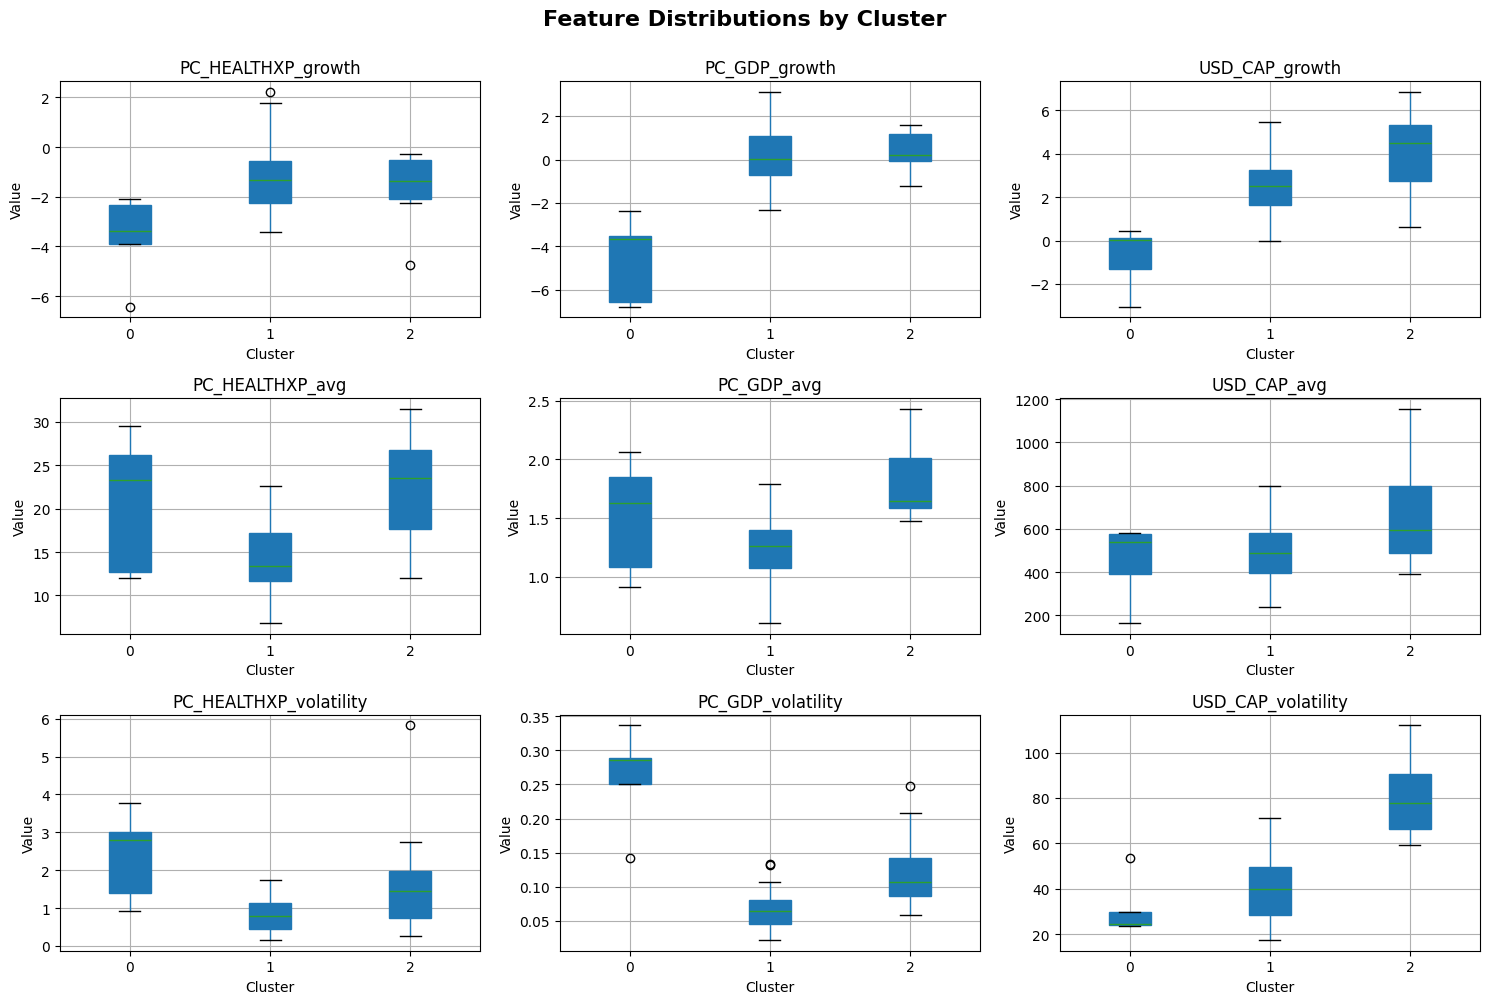

In [8]:
# Plot feature distributions
analyzer.plot_cluster_distributions(figsize=(15, 10))

### Step 8: Get Countries by Cluster

In [9]:
# Get all countries grouped by cluster
cluster_countries = analyzer.get_cluster_countries()

for cluster_id, countries in cluster_countries.items():
    cluster_name = cluster_names[cluster_id]
    print(f"\n{cluster_name} ({len(countries)} countries):")
    print(f"  {', '.join(countries)}")


Declining Markets (5 countries):
  CRI, HRV, HUN, IRL, SVK

Stable Moderate Markets (23 countries):
  AUS, AUT, BEL, CAN, CHE, CYP, CZE, DNK, ESP, EST, FIN, FRA, ISL, ISR, ITA, LUX, MEX, NLD, NOR, POL, PRT, SVN, SWE

High-Value Pharma Markets (8 countries):
  DEU, GRC, JPN, KOR, LTU, LVA, ROU, USA


### Step 9: Export Results 

In [10]:
# Export results to CSV
analyzer.export_results('../Data/processing/clustering_results.csv')

✓ Results exported to: ../Data/processing/clustering_results.csv


---

## 📊 Cluster Profiles: The Three Market Segments

### 🔴 Cluster 0: Crisis/Declining Markets

#### Characteristics:
- **Economic Performance**: Severe negative GDP growth (-4% to -6%)
- **Pharma Spending**: High share of health budget (13-30%) but declining
- **Per Capita Spending**: Moderate ($400-600)
- **Volatility**: HIGH - Unstable spending patterns and economic conditions
- **Growth Trajectory**: Negative across all metrics

#### Spending Pattern Insights:
These markets show a **defensive spending pattern**: pharma maintains a high share of health budgets despite economic contraction, suggesting:
- Essential medicines remain prioritized even in crisis
- Limited discretionary spending capacity
- Potential for generic/lower-cost products
- Budget pressures driving cost containment

#### Temporal Trends:
Over the analyzed years, these countries experienced:
- **Consistent decline** in per capita spending
- **Increasing volatility** in spending patterns
- **Budget reallocation** away from pharma despite high baseline shares

#### Market Entry Strategy:

**🚫 NOT RECOMMENDED for New Entry**

**Rationale:**
- High market risk due to economic instability
- Declining purchasing power
- Unpredictable payment patterns
- Price pressure and reimbursement challenges

**IF Already Present:**
- ✅ Focus on **essential medicines** and generics
- ✅ Implement **flexible pricing** and payment terms
- ✅ Develop **cost-effective** distribution channels
- ✅ Monitor for **early signs of recovery** as reentry opportunity
- ⚠️ Maintain **minimal inventory** and reduce fixed costs

**Success Metrics:**
- Market share maintenance (not growth)
- Cash flow positive operations
- Relationship preservation for future recovery

---

## 💡 Cross-Cluster Insights: Spending Patterns Over Time

In [11]:
# Calculate and display key comparative metrics
metrics = analyzer.get_comparative_metrics()


KEY COMPARATIVE METRICS ACROSS CLUSTERS

Mean and Standard Deviation by Cluster:
--------------------------------------------------------------------------------
            USD_CAP_avg_mean  USD_CAP_avg_std  USD_CAP_growth_mean  USD_CAP_growth_std  PC_HEALTHXP_avg_mean  PC_HEALTHXP_avg_std  PC_GDP_avg_mean  PC_GDP_avg_std
Cluster_k3                                                                                                                                                        
0                     449.98           178.15                -0.75                1.44                 20.76                 7.96             1.51            0.50
1                     494.75           130.07                 2.45                1.33                 14.08                 4.22             1.21            0.31
2                     658.98           255.50                 4.00                2.04                 22.28                 6.90             1.80            0.33


GROWTH ANALYSIS & PR

---------------

### Key Finding 1: Diverging Trajectories

The three clusters are **moving in different directions**:

- **Cluster 0 (Crisis)**: Declining spending despite high pharma share → Budget pressures forcing difficult choices
- **Cluster 1 (Stable)**: Steady, proportional growth → Healthcare spending growing with economy
- **Cluster 2 (High-Value)**: Accelerating spending → Pharma outpacing general health spending growth

**Implication**: The gap between premium and crisis markets is **widening**, creating increasingly distinct strategic pathways.

### Key Finding 2: Pharma Spending Intensity

**Pharma as % of health spending** reveals priorities:

- **Cluster 0**: High pharma share (13-30%) in constrained budgets → Pharma competing with other health needs
- **Cluster 1**: Moderate share (12-22%) in balanced budgets → Pharma one of several priorities
- **Cluster 2**: High share (18-32%) in expanding budgets → Pharma receiving growing investment

**Critical Insight**: High pharma share means different things in different contexts:
- In **Crisis markets** (Cluster 0): Defensive necessity with pressure to reduce
- In **High-Value markets** (Cluster 2): Strategic investment with room to grow

### Key Finding 3: Per Capita Spending vs. GDP Relationship

Examining **PC_GDP_avg** (health spending as % of GDP):

- **Cluster 0**: High % of GDP going to health, but GDP is shrinking → Absolute dollars declining
- **Cluster 1**: Stable % of GDP, GDP growing steadily → Proportional increase
- **Cluster 2**: High % of GDP, GDP growing strongly → Compounding effect on absolute spending

**Market Opportunity Math**:
- A 2% health spending share of a $60,000 per capita GDP (Cluster 2) = $1,200 pharma spending
- A 2% health spending share of a $30,000 per capita GDP (Cluster 0) = $600 pharma spending
- **PLUS** GDP growth rate difference amplifies this gap over time

### Key Finding 4: Volatility Patterns

**Volatility interpretation** differs by cluster:

- **Cluster 0**: High volatility = **Risk** (unpredictable downside)
- **Cluster 1**: Low volatility = **Reliability** (predictable planning)
- **Cluster 2**: Moderate volatility = **Opportunity** (upside from innovation adoption)

**Strategic Implication**: Not all volatility is bad; in growing markets, it often reflects rapid adoption of new therapies rather than instability.

---

## 🎯 Strategic Recommendations: Market Entry Framework

### Recommendation 1: Portfolio Segmentation

**Match product portfolio to cluster characteristics:**

| Product Type | Cluster 0 (Crisis) | Cluster 1 (Stable) | Cluster 2 (High-Value) |
|--------------|--------------------|--------------------|------------------------|
| **Innovative/Specialty** | ❌ Avoid | ⚠️ Selective | ✅ Priority |
| **Branded Generics** | ⚠️ If present | ✅ Core strategy | ✅ Quality tier |
| **Commodity Generics** | ✅ If present | ✅ Volume play | ❌ Avoid |
| **Biosimilars** | ❌ Avoid | ✅ Good fit | ✅ Premium biosimilars |
| **OTC/Consumer** | ⚠️ Risk assessment needed | ✅ Stable demand | ✅ Premium positioning |

### Recommendation 2: Resource Allocation

**Suggested investment distribution** (hypothetical $100M budget):

- **Cluster 2 (High-Value)**: 60-70% of new investment
  - Direct sales force
  - Clinical trials and evidence generation
  - Medical affairs and KOL engagement
  - Patient support programs

- **Cluster 1 (Stable)**: 25-35% of new investment
  - Distribution partnerships
  - Broad product registration
  - Market access and reimbursement
  - Local manufacturing/sourcing

- **Cluster 0 (Crisis)**: 0-5% of new investment
  - Maintenance only if already present
  - Monitor for recovery signals
  - Relationship preservation

### Recommendation 3: Timing Strategy

**Phased market entry approach:**

**Phase 1 (Year 1)**: Cluster 2 Focus
- Launch in 2-3 flagship countries from Cluster 2
- Establish premium positioning
- Generate clinical evidence and real-world data
- Build reference pricing for other markets

**Phase 2 (Years 2-3)**: Cluster 1 Expansion
- Use Cluster 2 success as evidence
- Enter Cluster 1 markets with adapted pricing
- Leverage regional dossiers and approvals
- Build volume through broader access

**Phase 3 (Years 4+)**: Selective Cluster 0
- Only if markets show recovery signs
- Adapted formulations/packaging for price points
- Partnership models to minimize risk

### Recommendation 4: Risk Management

**Cluster-specific risk mitigation:**

**For Cluster 0 (if present):**
- Demand advance/guaranteed payments
- Short contract terms (annual renewal)
- Local currency hedging
- Exit strategy planning

**For Cluster 1:**
- Long-term contracts with price escalation
- Invest in local relationships
- Diversification across multiple countries

**For Cluster 2:**
- Competitive intelligence (fast-moving market)
- IP protection and anti-counterfeiting
- Premium pricing defense strategy
- Rapid response to new entrants

### Recommendation 5: Success Metrics by Cluster

**Define success differently for each cluster:**

**Cluster 0 (Crisis)**:
- ✓ Cash flow positive
- ✓ No bad debt
- ✓ Relationships maintained
- ❌ Don't expect growth

**Cluster 1 (Stable)**:
- ✓ 2-3% annual growth
- ✓ Market share 5-10% in 3-5 years
- ✓ Profitability in 18-24 months
- ✓ Reliable recurring revenue

**Cluster 2 (High-Value)**:
- ✓ 5-8% annual growth
- ✓ Market leadership in segments
- ✓ Premium pricing achieved
- ✓ First-mover advantage on launches
- ✓ Strong brand equity